In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4_clustering_coefficient_er.ipynb")

In [2]:
!pip install --upgrade networkx

  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [3]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx

import warnings
warnings.filterwarnings('ignore')

# Lab4: Clustering coefficient and the Erdos-Renyi random graph Model

In this lab, we are going to test a hypothesis about clustering in social networks. 

From the lectures, we learned that social networks tend to be clustered because of mechanisms such as triadic closure. However, how can we be sure that clustering really exists in real-life networks? It seems possible that the structure of any network is a result of random processes rather than clustering. We need to perform some hypothesis testing to examine this possibility.

First, similar to what we did in Lab 3, we will will set up a null model and an alternative model. Our alternative model will be a real-life social network, and our null model will be random generated networks with the same number of nodes and the same level of connectivity (i.e. the same average degree). Then, we can compare the two networks to see if the real-life social network is more clustered than the random networks. 

We will use one of the 84 Add Health networks for the alternative model, and 1000 Erdos-Renyi(ER) networks that we learned in lecture for the null model. Clustering will be measured by the clustering coefficient, defined as the probability that two randomly selected friends of the node are friends with each other (You can chcek out this [demo](https://datahub.berkeley.edu/user/xinghe_pan/lab/workspaces/auto-K/tree/demog180-fa2024/lecture/20240905_clusteringcoef/clustering_coefficient.ipynb) on clustering coefficient).

Our hypotheses are: 
    
**Null hypothesis ($H_0$): the level of clustering is the same in the Add Health network and the random networks.**  

**Alternative hypothesis ($H_1$): the level of clustering is higher in the Add Health network than in the random networks.**

### Add Health Networks

Let's start by reading in one arbitrary Add Health network:

In [4]:
def read_add_health_network(network_id):
    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("data", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

In [5]:
# read in network #10
add_health_network = read_add_health_network(9)

## Question 1:

Calculate network statistics, including number of nodes, average degree, and clustering coefficient for `add_health_network`.

In [33]:
num_nodes = add_health_network.number_of_nodes()
avg_degree = 2*add_health_network.number_of_edges()/add_health_network.number_of_nodes()
clustering_coef = nx.average_clustering(add_health_network)

In [34]:
grader.check("q1")

q1 results: All test cases passed!

The clustering coefficient of this Add Health network is:

In [15]:
clustering_coef

0.31319491485494444

## ER Networks

We learned that the ER model has two parameters: 

* $n$ - the number of nodes in the network
* $p$ - for each pair of nodes, the probability that those nodes are connected by an edge

## Question 2: 

Generate an ER model using the parameters $n = 10$ and $p = 0.3$:

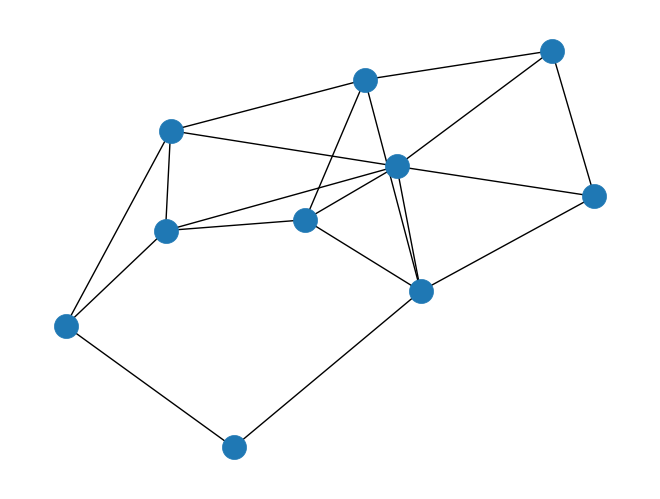

In [17]:
first_er = nx.erdos_renyi_graph(10, 0.3) 
nx.draw(first_er)
#nx.erdos_renyi_graph?

In [18]:
grader.check("q2")

q2 results: All test cases passed!

The ER model can also be parametrized by the average degree, or $\bar{d}$, because average degree is directly related to $n$ and $p$:

$$\bar{d} = p (n-1)$$

that is, 

$$p = \frac{\bar{d}}{n-1}$$


## Question 3:

Calculate the average degree of an ER model with parameters $n=10$ and $p=0.3$:

In [19]:
n_q3 = 10
p_q3 = 0.3
dbar_q3 = p_q3*(n_q3-1)

In [20]:
grader.check("q3")

q3 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Question 4:

Let's write a custom function to generate ER networks using parameters $n$ and $\bar{d}$ for our purpose:

In [21]:
def gen_er_by_avg_degree(n, dbar):
    return(nx.erdos_renyi_graph(n, (dbar/(n-1)))) 

<!-- END QUESTION -->

## Question 5

Now, we can generate 1000 ER networks, using the number of nodes and the average degree of the Add Health network as values of $n$ and $\bar{d}$, respectively. Then, calculate the clustering coefficient for each network and store in an array:

In [35]:
n = num_nodes
dbar = avg_degree

cc_er = make_array()

for _ in range(1000):
    er = gen_er_by_avg_degree(n, dbar)
    cc_er = np.append(cc_er, nx.average_clustering(er))
    #print(er)

In [36]:
grader.check("q5")

q5 results: All test cases passed!

Let's check the distribution of clustering coefficients in the ER models:

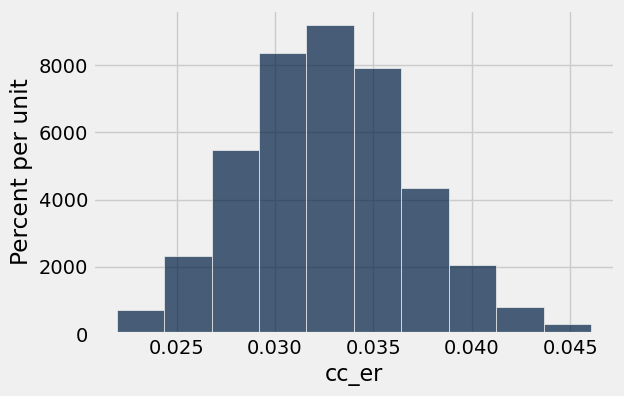

In [37]:
Table().with_column('cc_er', cc_er).hist()

It looks like the majority of ER networks has clustering coefficients below 0.01, which seems much smaller than that of the Add Health network we selected. Let's calculate an empirical $p$ value to be sure:

In [38]:
emp_p_value = np.mean(cc_er >= clustering_coef)
emp_p_value

0.0

<!-- BEGIN QUESTION -->

## Question 6

Based on the empirical $p$ value above, what can we conclude about our null and alternative hypotheses based on a significance level of 0.05?  

_With a p value of practically 0, we can reject our null hypothesis and move forward with our alternative hypothesis that **the level of clustering is higher in the Add Health network than in the random networks.**_

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [39]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please upload the .zip file to Gradescope.

In [40]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q5 results: All test cases passed!
